In [1]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
DATABASE = MongoClient()['primecart']
USERS_COLLECTION = 'Users'
PRODUCT_COLLECTION = 'ProductData'
PURCHASE_COLLECTION = 'PurchaseData'
CARTS_COLLECTION = 'Carts'

In [3]:
cursor = DATABASE[PURCHASE_COLLECTION].find()
data = pd.DataFrame(list(cursor))

In [4]:
data.head()

,_id,InvoiceId,CustomerId,ProductId,Quantity
0,5ea6f01d7c199c084bc0bd8a,536365,17850,3693,6
1,5ea6f01d7c199c084bc0bd8b,536365,17850,1047,6
2,5ea6f01d7c199c084bc0bd8c,536365,17850,17,8
3,5ea6f01d7c199c084bc0bd8d,536365,17850,634,6
4,5ea6f01d7c199c084bc0bd8e,536365,17850,1950,6


In [5]:
product_count = {}
counter = 0
for i in data.values:
    try:
        if int(i[3]) in product_count.keys():
            product_count[int(i[3])] += 1
        else:
            product_count[int(i[3])] = 1
    except TypeError:
        pass

In [6]:
sorted_product_count = {k: v for k, v in sorted(product_count.items(), key=lambda item: item[1], reverse=True)}

In [18]:
x=[]
y=[]
counter = 0
for key, value in sorted_product_count.items():
    x.append(str(key))
    y.append(value)
    counter += 1
    if counter==10:
        break

In [19]:
top_products = DATABASE[PRODUCT_COLLECTION].find({'ProductId' : {'$in' : x}})
products = {}
for i in top_products:
    products.update({int(i['ProductId']) : i['ProductName']})

In [26]:
x1 = []
for i in x:
    x1.append(products[int(i)])


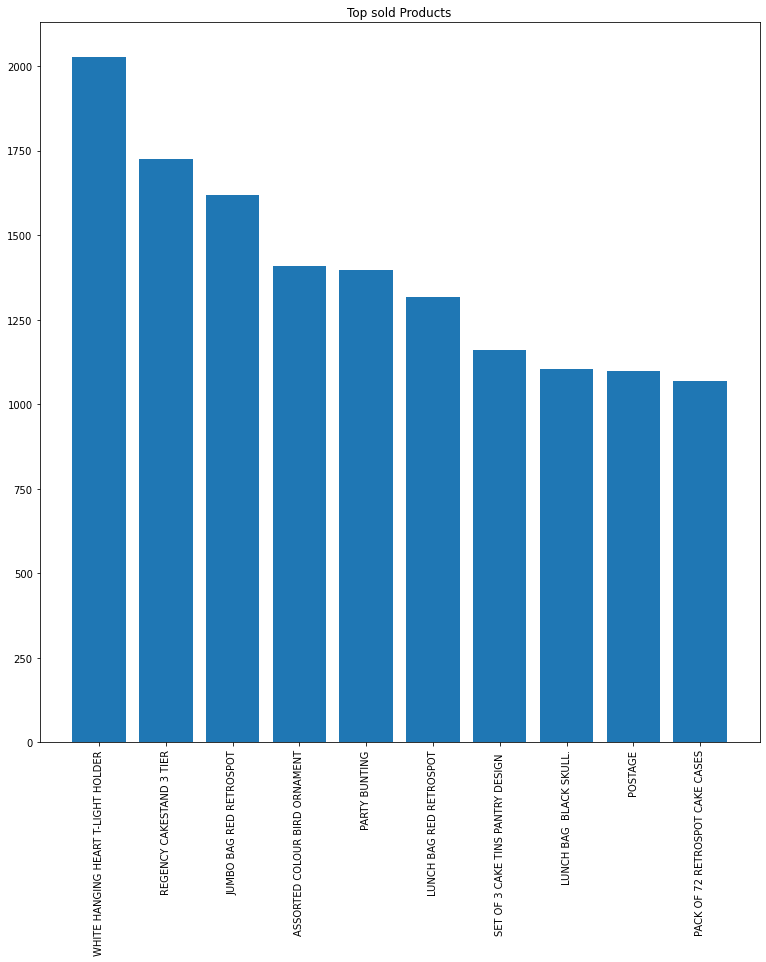

In [38]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x1, y)
plt.xticks(rotation='vertical')
plt.title('Top sold Products')
fig.savefig('primecart/static/img/top_products.png', transparent=False)

In [24]:
products[3693]

'WHITE HANGING HEART T-LIGHT HOLDER'

In [10]:
y

[2028, 1724, 1618, 1408, 1397, 1316, 1159, 1105, 1099, 1068]